In [1]:
import scipy
import matplotlib.pyplot as plt   # MATLAB plotting functions
from control.matlab import *  # MATLAB-like functions
import numpy as np
from math import *

In [2]:
# PWM angular velocity

omega_pwm = 200e3 # rad/sec
Ts = (2*3.1415) / omega_pwm
freq = 1/Ts

print("pwm frequency = ", floor(freq), "Hz")

pwm frequency =  31831 Hz


The RL circuit as shown below

![image](img\rlcircuit.png)

In [3]:
# Parameters

omega_w = 1000 # rad/sec

Rs = 0.1
Ls = Rs / omega_w
ts = Ls/Rs

print("time constant = ", ts)

time constant =  0.001


In [4]:
# Transfer function
Gs = tf(1, [Ls, Rs])

print(Gs)


      1
--------------
0.0001 s + 0.1



The ideal system control block as shown below

![image](img\ideal_system.png)

In [5]:
# close loop control transfer function
H = 1
Gcl = feedback(Gs, H)
kr = dcgain(Gcl)
Gcl = Gcl/kr

print(Gcl)


       1
---------------
9.091e-05 s + 1



Consider the system has a delay function

![image](img\delay_system.png)

**Pad´e-approximation of a time delay**

In [6]:
Td = 1 * Ts
n_pade = 10
num_pade, den_pade = pade(Td, n_pade)
H_pade = tf(num_pade, den_pade)

Gsd = series(Gs, H_pade)

In [7]:
# close loop control with delay
Gcld = feedback(Gsd, H)
kr =  dcgain(Gcld)
Gcld = Gcld/kr

print(Gcld)


           s^10 - 3.502e+06 s^9 + 6.019e+12 s^8 - 6.642e+18 s^7 + 5.18e+24 s^6 - 2.968e+30 s^5 + 1.26e+36 s^4 - 3.895e+41 s^3 + 8.369e+46 s^2 - 1.125e+52 s + 7.161e+56
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
9.091e-05 s^11 + 319.3 s^10 + 5.443e+08 s^9 + 6.098e+14 s^8 + 4.655e+20 s^7 + 2.75e+26 s^6 + 1.121e+32 s^5 + 3.667e+37 s^4 + 7.29e+42 s^3 + 1.106e+48 s^2 + 5.59e+52 s + 7.161e+56



### Plot Step Response

C:\Users\Jim\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=7.25759e-97): result may not be accurate.
  return solve(Q, P)


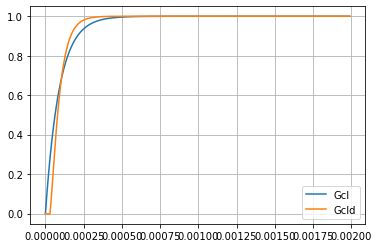

In [8]:
t = np.arange(0, 0.002, 1e-5)

yout, T = step(Gcl, t)
plt.plot(T.T, yout.T, label="Gcl")

yout, T = step(Gcld, t)
plt.plot(T.T, yout.T, label="Gcld")
plt.grid()
plt.legend()

### Plot Bode diagram

The ideal system bode plot as shown below

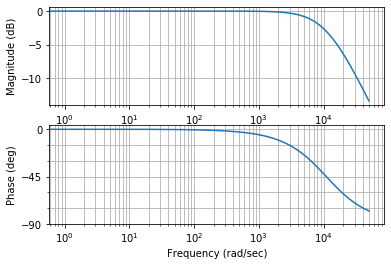

In [9]:
w = np.arange(0, 0.5e5, 1)
mag1, phase1, om1 = bode(Gcl, w)

Gain margin & Phase Margin of the ideal system

In [10]:
gm, pm, wcg, wcp = margin(Gcl)

print("Gain margin = ", gm, "dB")
print("Phase maring = ", pm, "deg")

Gain margin =  inf dB
Phase maring =  inf deg


The bode plot of the system with delay function as shown below

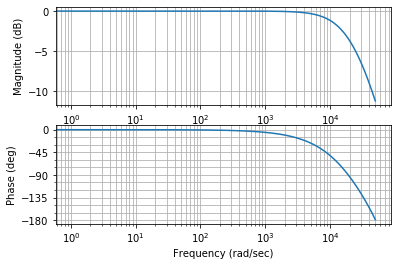

In [11]:
mag2, phase2, om2 = bode(Gcld, w)

Gain margin & Phase Margin of the delay system

In [12]:
gm, pm, wcg, wcp = margin(Gcld)

print("Gain margin = ", gm, "dB")
print("Phase maring = ", pm, "deg")

Gain margin =  3.6945438992548087 dB
Phase maring =  inf deg


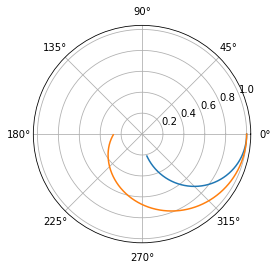

In [13]:
plt.polar(phase1, mag1, phase2, mag2)
plt.grid(True)

Comparing the bode of the two is shown below

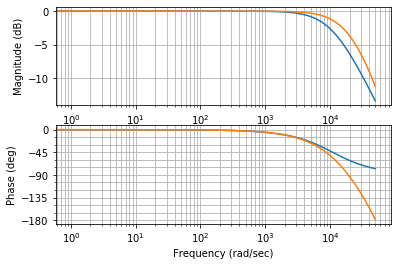

In [14]:
m, p, o = bode(Gcl, Gcld, w)

### Discrete Analysis

Consider this system is under discrete-time domain

In [15]:
# discrete transfer function without time-delay
Tz = c2d(Gcl, Ts)

In [16]:
# discrete transfer function with time-delay
Tzd = c2d(Gcld, Ts)

C:\Users\Jim\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=1.17663e-96): result may not be accurate.
  return solve(Q, P)


### Plot Step Response

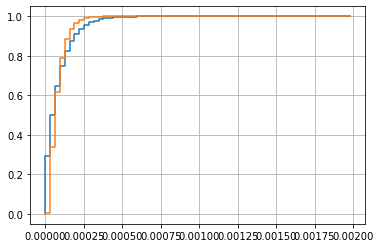

In [17]:
t = np.arange(0, 0.002, Ts)
yout, T = step(Tz, t)
plt.step(T.T, yout.T)
yout, T = step(Tzd, t)
plt.step(T.T, yout.T)
plt.grid()
plt.show()

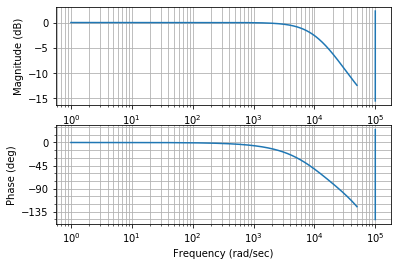

In [18]:
w = np.arange(1, 0.5e5, 1)
mag1, phase1, om1 = bode(Tz, w)

In [19]:
gm, pm, wcg, wcp = margin(Tz)

print("Gain margin = ", gm, "dB")
print("Phase maring = ", pm, "deg")

Gain margin =  inf dB
Phase maring =  inf deg


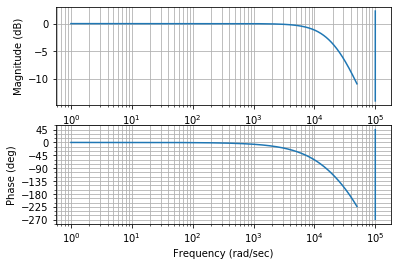

In [20]:
mag2, phase2, om2 = bode(Tzd, w)

In [21]:
gm, pm, wcg, wcp = margin(Tzd)

print("Gain margin = ", gm, "dB")
print("Phase maring = ", pm, "deg")

Gain margin =  2.5269465016209 dB
Phase maring =  inf deg


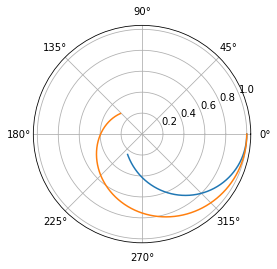

In [22]:
plt.polar(phase1, mag1, phase2, mag2)
plt.grid(True)

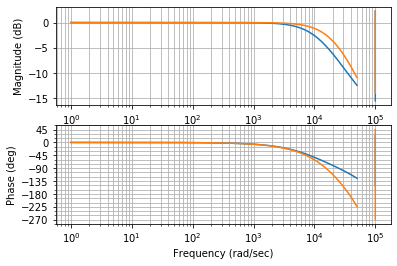

In [23]:
m, p, o = bode(Tz, Tzd, w)